<div align="center">
    <h1 style="font-size: 24px; font-weight: bold;
               font-family: 'Times New Roman',
               Times, serif;"> SUBPLOTS EXAMPLE </h1>
    <h4 style="font-size: 18px; font-style: italic;
               font-family: 'Times New Roman',
               Times, serif;">Hamid Syed</h4>
    <h6 style="font-size: 12px; font-style: italic;
               font-family: 'Times New Roman',
               Times, serif;">Jan 8, 2023</h6>
</div>


<br>
<div align="center">
    <ul style="list-style-type: none; padding: 0;"></ul>
    <div style="display: inline-flex;">
<!--         <a href="https://www.google.com/maps/search/?api=1&query=550+Stadium+Mall+Drive,West+Lafayette,IN+47907" style="margin-right: 5px">
            <img src="https://img.shields.io/badge/550%20Stadium%20Mall%20Drive,%20West%20Lafayette,%20IN%2047907-grey" alt="Address">
        </a> -->
        <a href="mailto:syed44@purdue.edu" style="margin-right: 5px">
            <img src="https://img.shields.io/badge/syed44%40purdue.edu-grey?logo=gmail&logoColor=white" alt="Email">
        </a>
        <a href="https://syedha.com">
            <img src="https://img.shields.io/badge/https://syedha.com-grey" alt="Website">
        </a>
    </div>
    <br>
    <div style="display: inline-flex;">
        <a href="https://github.com/syedhamidali" style="margin-right: 5px">
            <img src="https://img.shields.io/badge/syedhamidali-grey?logo=github" alt="GitHub">
        </a>
        <a href="https://www.linkedin.com/in/hamidrixvi" style="margin-right: 5px">
            <img src="https://img.shields.io/badge/hamidrixvi-grey?logo=linkedin" alt="LinkedIn">
        </a>
        <a href="https://twitter.com/hamidrixvi" style="margin-right: 5px">
            <img src="https://img.shields.io/badge/hamidrixvi-grey?logo=twitter" alt="Twitter">
        </a>
        <a href="https://instagram.com/hamidrixvi" style="margin-right: 5px">
            <img src="https://img.shields.io/badge/hamidrixvi-grey?logo=instagram" alt="Instagram">
        </a>
        <a href="https://facebook.com/hamidrixvi">
            <img src="https://img.shields.io/badge/hamidrixvi-grey?logo=facebook" alt="Facebook">
        </a>
    </div>
</div>

In [42]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("/home/syed44/PERiLS/doppler_analysis/universal_defs/")
import detailed_maps as dmaps
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.tutorial.load_dataset("air_temperature.nc")

In [3]:
grouped_data = ds.groupby('time.season').mean()
grouped_data

<xarray.Dataset>
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float32 247.0 247.0 246.7 ... 299.4 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

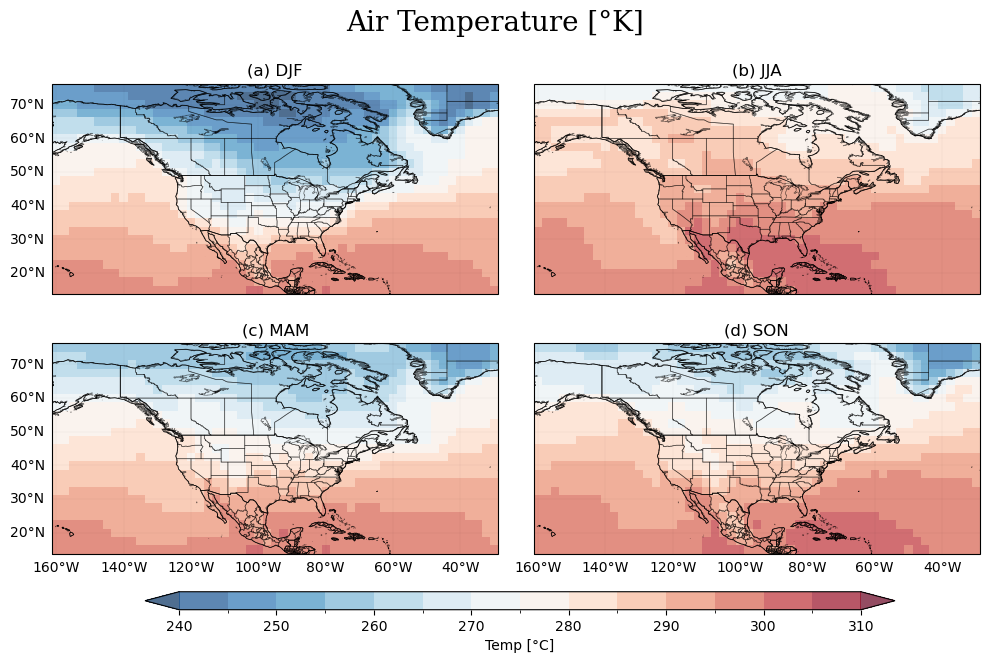

In [4]:
grouped_data = ds.groupby('time.season').mean()

fig = plt.figure(figsize=[10, 6])
ax = plt.subplot(221, projection=ccrs.PlateCarree())

grouped_data['air'].sel(season="DJF").plot(levels=range(240, 311, 5),
                                           extend='both', cmap='RdBu_r',
                                           add_colorbar=False,alpha=0.7)

ax.set_title('(a) DJF')
dmaps.map_features(ax, b=False, l=True, coastline=True, borders=True)

#2
ax = plt.subplot(222, projection=ccrs.PlateCarree())
grouped_data['air'].sel(season="JJA").plot(levels=range(240, 311, 5),
                                           extend='both', cmap='RdBu_r',
                                           add_colorbar=False,alpha=0.7)
ax.set_title('(b) JJA')
dmaps.map_features(ax, b=False, l=False, coastline=True, borders=True)

#3
ax = plt.subplot(223, projection=ccrs.PlateCarree())
grouped_data['air'].sel(season="MAM").plot(levels=range(240, 311, 5),
                                           extend='both', cmap='RdBu_r',
                                           add_colorbar=False,alpha=0.7)
ax.set_title('(c) MAM')
dmaps.map_features(ax, b=True, l=True, coastline=True, borders=True)


ax = plt.subplot(224, projection=ccrs.PlateCarree())
pl = grouped_data['air'].sel(season="SON").plot(levels=range(240, 311, 5),
                                           extend='both', cmap='RdBu_r',
                                           add_colorbar=False,alpha=0.7)
ax.set_title('(d) SON')
dmaps.map_features(ax, b=True, l=False, coastline=True, borders=True)


cbar_ax = fig.add_axes([0.15, -0.02, 0.75, 0.03],)#lbwh
cbar1 = fig.colorbar(pl, cax=cbar_ax,orientation='horizontal')
cbar1.set_label('Temp [°C]')

plt.suptitle('Air Temperature [°K]',weight = 'normal',family='serif',size=20)
plt.tight_layout()
# plt.savefig('AIR_TEMPS_600.png',dpi=600, bbox_inches='tight')

In [5]:
ds = xr.tutorial.load_dataset("ersstv5.nc")
def align_coords(ds):
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds = ds.sortby(["lat", "lon"])
    return ds
ds = align_coords(ds)

In [6]:
ds_decadal_mean = ds.groupby(ds['time.year'] // 10 * 10).mean(dim='time')
ds_decadal_mean
# print(ds_decadal_mean)

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, year: 6, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lon        (lon) float32 -180.0 -178.0 -176.0 -174.0 ... 174.0 176.0 178.0
  * year       (year) int64 1970 1980 1990 2000 2010 2020
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (year, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (year, lat, lon) float32 nan nan nan nan ... -1.8 -1.8 -1.8 -1.8
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

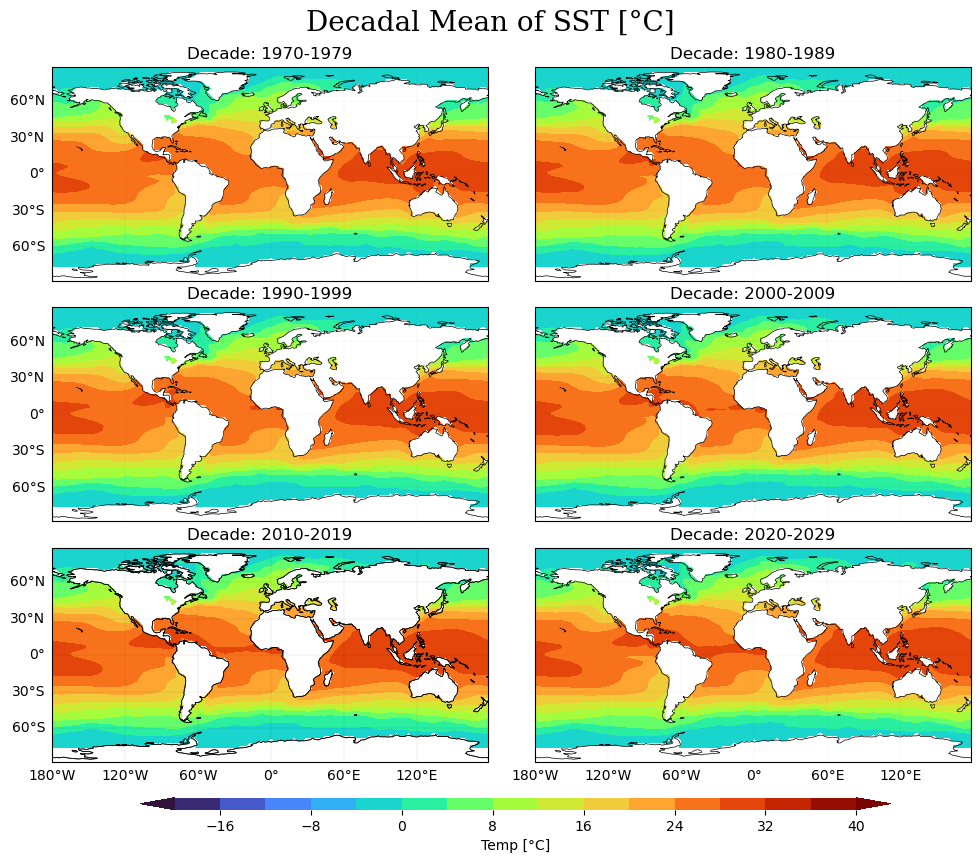

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8), sharex=True, sharey=True, )

for i, ax in enumerate(axes.flatten()):
    decade_data = ds_decadal_mean['sst'].isel(year=i)
    ax = plt.subplot(3, 2, i+1, projection=ccrs.PlateCarree())
    plot = ax.contourf(decade_data['lon'], decade_data['lat'], decade_data,
                       levels=range(-20, 41, 4), extend='both', cmap='turbo')

    ax.set_title(f'Decade: {ds_decadal_mean.year.values[i]}-{ds_decadal_mean.year.values[i] + 9}')
    
    if i+1 in [1, 3, 5]:
        dmaps.map_features(ax, b=False, l=True, coastline=True, borders=False, states=False)
    if i+1 in [2, 4]:
        dmaps.map_features(ax, b=False, l=False, coastline=True, borders=False, states=False)
    if i+1 in [5, 6]:
        dmaps.map_features(ax, b=True, l=False, coastline=True, borders=False, states=False)

plt.tight_layout()

cbar_ax = fig.add_axes([0.15, -0.02, 0.75, 0.015],)#lbwh
cbar1 = fig.colorbar(plot, cax=cbar_ax,orientation='horizontal')
cbar1.set_label('Temp [°C]')
cbar1.outline.set_linewidth(0)  # Set the width of the colorbar outline

plt.suptitle('Decadal Mean of SST [°C]',weight = 'normal',family='serif',size=20)
plt.tight_layout()
# plt.savefig('decadal_mean_sst.png', dpi=300, bbox_inches='tight')


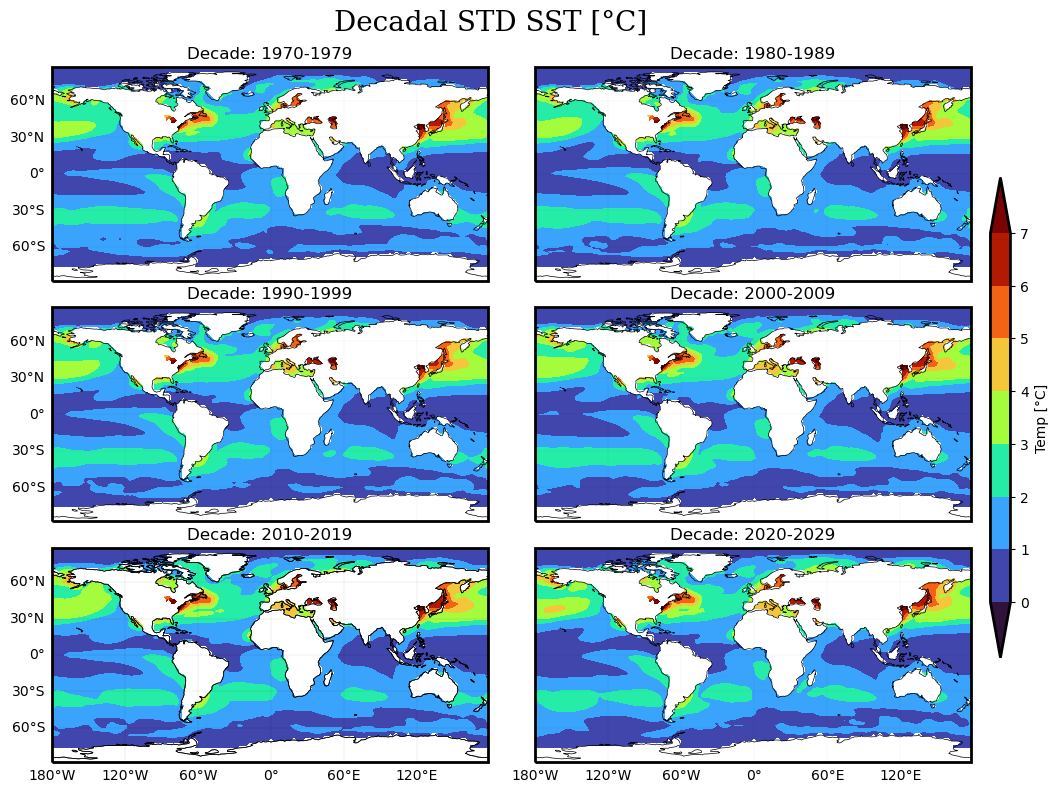

In [8]:
ds_decadal_mean = ds.groupby(ds['time.year'] // 10 * 10).std(dim='time')

fig, axes = plt.subplots(2, 3, figsize=(10, 8),)

for i, ax in enumerate(axes.flatten()):
    decade_data = ds_decadal_mean['sst'].isel(year=i)
    ax = plt.subplot(3, 2, i+1, projection=ccrs.PlateCarree())
    plot = ax.contourf(decade_data['lon'], decade_data['lat'], decade_data,
                       levels=range(0, 8, 1), extend='both', cmap='turbo')

    ax.set_title(f'Decade: {ds_decadal_mean.year.values[i]}-{ds_decadal_mean.year.values[i] + 9}')
    
    if i+1 in [1, 3, 5]:
        dmaps.map_features(ax, b=False, l=True, coastline=True, borders=False, states=False)
    if i+1 in [2, 4]:
        dmaps.map_features(ax, b=False, l=False, coastline=True, borders=False, states=False)
    if i+1 in [5, 6]:
        dmaps.map_features(ax, b=True, l=False, coastline=True, borders=False, states=False)
        
    for spine in ax.spines.values():
        spine.set_linewidth(2)

plt.tight_layout()

cbar_ax = fig.add_axes([1, 0.17, 0.02, 0.6]) #x0, y0,width,ratio
cbar1 = fig.colorbar(plot, cax=cbar_ax, orientation='vertical', extendfrac=0.15)
cbar1.set_label('Temp [°C]')
cbar1.outline.set_linewidth(2)  # Set the width of the colorbar outline
plt.suptitle('Decadal STD SST [°C]',weight = 'normal',family='serif',size=20)
plt.tight_layout()
# plt.savefig('decadal_std_sst.png', dpi=300, bbox_inches='tight')


In [9]:
!cat /home/syed44/PERiLS/doppler_analysis/universal_defs/detailed_maps.py

import os
import urllib.request
import cartopy.crs as ccrs
import cartopy.feature as feat
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt


def annotate_map(ax, states, cities, extent):
    '''
    Annotate the map with state and city names.

    Parameters:
    - ax (matplotlib.axes.Axes): The target axes to annotate.
    - states (list): List of state geometries.
    - cities (list): List of city geometries.
    '''
    for state in states:
        geometry = state.geometry
        lon, lat = calculate_centroid(geometry)
        name = state.attributes["name"]
        if extent[0] < lon < extent[1]-0.5 and extent[2] < lat < extent[3]-0.4:
            ax.text(lon, lat, name, fontweight='bold')

    for city in cities:
        geometry = city.geometry
        lon, lat = calculate_centroid(geometry)
        name = city.attributes["NAME"]
        if exte

In [10]:
from metpy.cbook import get_test_data

In [14]:
# Open the netCDF file as a xarray Dataset
data = xr.open_dataset(get_test_data('irma_gfs_example.nc', False))
# View a summary of the Dataset
# data

In [15]:
def align_coords(ds):
    lon_coords = [coord for coord in ds.coords if 'lon' in coord.lower() or coord.lower().startswith('lon')]
    lat_coords = [coord for coord in ds.coords if 'lat' in coord.lower() or coord.lower().startswith('lat')]
    
    for lon_coord in lon_coords:
        ds.coords[lon_coord] = (ds.coords[lon_coord] + 180) % 360 - 180
    
    ds = ds.sortby(lat_coords + lon_coords)
    
    return ds

ds = align_coords(data)

In [39]:
RH = ds.isel(time1=0, isobaric3=18)['Relative_humidity_isobaric']
U = ds.isel(time1=0, isobaric3=18)['u-component_of_wind_isobaric']
V = ds.isel(time1=0, isobaric3=18)['v-component_of_wind_isobaric']
GH = ds.isel(time1=0, isobaric3=18)['Geopotential_height_isobaric']

In [40]:
wnd = np.sqrt(U**2 + V**2)
x,y = np.meshgrid(wnd.longitude, wnd.latitude)

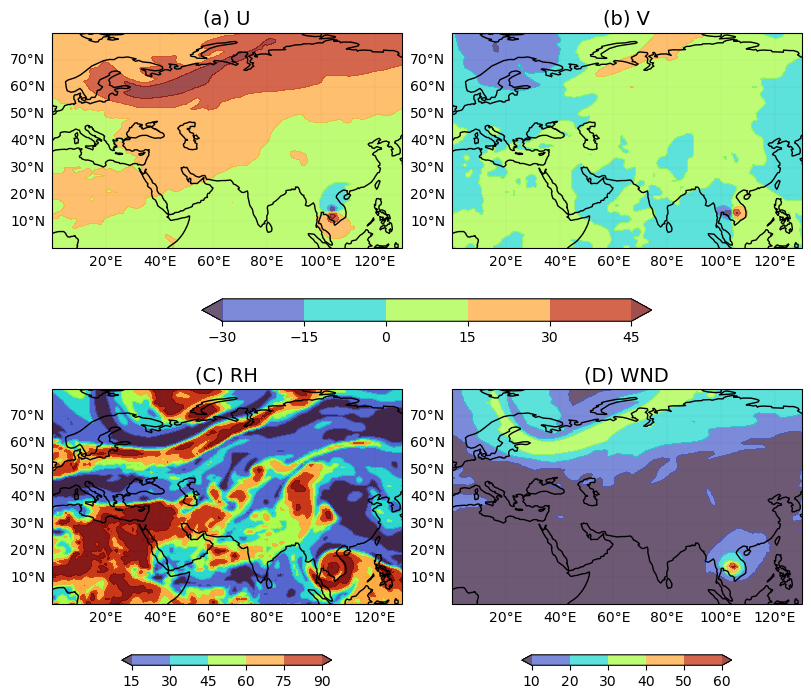

In [41]:
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8,7),constrained_layout=True)

fig.subplots_adjust(hspace=0.15,wspace=0,top=0.94)
pl = axs[0,0].contourf(U, cmap='turbo', extend='both', alpha=0.7)

axs[0,0].set_title('(a) U', fontsize=14)

pl = axs[0,1].contourf(V, cmap='turbo', extend='both', alpha=0.7)

axs[0,1].set_title('(b) V', fontsize=14)
cbar1 = fig.colorbar(pl, ax = axs[0:1],orientation='horizontal',shrink=0.6,pad=0.1)

pl = axs[1,0].contourf(RH, cmap='turbo', extend='both', alpha=0.7)

axs[1,0].set_title('(C) RH', fontsize=14)

pl = axs[1,0].contourf(RH, cmap='turbo', extend='both', alpha=0.7)

axs[1,0].set_title('(C) RH', fontsize=14)
cbar1 = fig.colorbar(pl, ax = axs[1,0],orientation='horizontal',shrink=0.6, pad=0.1)

pl = axs[1,1].contourf(wnd, cmap='turbo', extend='both', alpha=0.7)

axs[1,1].set_title('(D) WND', fontsize=14)


cbar1 = fig.colorbar(pl, ax = axs[1,1],orientation='horizontal',shrink=0.6, pad=0.1)

for ax in axs.flat:
    ax.coastlines()
    dmaps.map_features(ax, b=1, l=1, states=False, borders=False)
for ax in axs.flat:
    ax.label_outer()
    ax.set_aspect(1)
# fig.subplots_adjust(top=1) 
# plt.tight_layout(pad=1, w_pad=2, h_pad=1.0)